## 1- Conhecendo os dados

### Pesquisa Nacional por Amostra de Domicílios - 2015

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos dados



https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

###  - Renda

### -  Idade

###  - Altura

###  - UF

#### Código Descrição

    11- Rondônia
    12- Acre
    13- Amazonas
    14- Roraima
    15- Pará
    16- Amapá
    17- Tocantins
    21- Maranhão
    22- Piauí
    23- Ceará
    24- Rio Grande do Norte
    25- Paraíba
    26- Pernambuco
    27- Alagoas
    28- Sergipe
    29- Bahia
    31- Minas Gerais
    32- Espírito Santo
    33- Rio de Janeiro
    35- São Paulo
    41- Paraná
    42- Santa Catarina
    43- Rio Grande do Sul
    50- Mato Grosso do Sul
    51- Mato Grosso
    52- Goiás
    53- Distrito Federal

### Sexo

##### Código    Descrição

     0- Masculino
   
     1- Feminino
  

### Anos de Estudo

#### Código	Descrição

1-	Sem instrução e menos de 1 ano

2-	1 ano

3-	2 anos

4-	3 anos

5-	4 anos

6-	5 anos

7-	6 anos

8-	7 anos

9-	8 anos

10-	9 anos

11-	10 anos

12-	11 anos

13-	12 anos

14-	13 anos

15-	14 anos

16-	15 anos ou mais

17-	Não determinados

Não aplicável

### Cor

#### Código	Descrição

0-	Indígena

2-	Branca

4-	Preta

6-	Amarela

8-	Parda

9-	Sem declaração

### Importando panda e lendo o dataset do projeto

In [117]:
import pandas as pd

In [118]:
dados = pd.read_csv(r"C:\Users\MARLI\Documents\dados.csv")

In [119]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


## Tipos de Dados

### Variáveis qualitativas ordinais

In [120]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

In [121]:
sorted(dados['Sexo'].unique())

[0, 1]

In [122]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

In [123]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

### Variáveis quantitativas discretas

In [124]:
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


### Variáveis quantitativas contínuas

In [125]:
print('De %s até %s metros' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


## 2- Distribuição de Frequências


### Distribuição de frequências para variáveis qualitativas

#### Método 1

In [126]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [127]:
dados['Sexo'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [128]:
frequencia = dados['Sexo'].value_counts()

In [129]:
percentual = dados['Sexo'].value_counts(normalize = True) * 100

In [130]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [131]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [132]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)

In [133]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


#### Método 2

In [134]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [135]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [136]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [137]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [138]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [139]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### Distribuição de frequências para variáveis quantitativas (classes personalizadas)

#### Passo 1 - Especificar os limites de cada classe

A: acima de 20;

B: de 10 a 20;

C: de 4 a 10;

D: de 2 a 4;

E: de zero até 2 salários mínimos

#### SM - Valor do Salário Minímo da Época R$788,00

A: Acima de R15.760

B: De R 7.880 𝑎 𝑅 15.760

C: De R 3.152 𝑎 𝑅 7.880

D: De R 1.576 𝑎 𝑅 3.152

E: Até R$1.576

In [140]:
dados.Renda.min()

0

In [141]:
dados.Renda.max()

200000

In [142]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [143]:
labels = ['E', 'D', 'C', 'B', 'A']

#### Passo 2 - Criar a tabela de frequências

In [144]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [145]:
pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [146]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [147]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [148]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


###  Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)

In [149]:
import numpy as np

#### Passo 1 - Difinindo o número de classes

##### Regra de Sturges


#### k = 1 + (10/3 log₁₀ n)

In [150]:
n = dados.shape
n

(76840, 7)

In [151]:
n = dados.shape[0]
n

76840

In [152]:
k = 1 + (10 / 3) * np.log10(n)  

In [153]:
k = k.round(0)
k

17.0

In [154]:
k = int(k.round(0))
k

17

#### Passo 2 - Criar a tabela de frequências

In [155]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17, 
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [156]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [157]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [158]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [159]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual*100}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### Histograma

In [160]:
import seaborn as sns

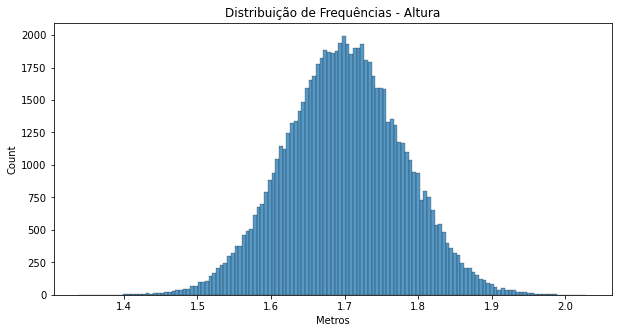

In [161]:
ax = sns.histplot(dados.Altura)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências - Altura', fontsize=12)
ax.set_xlabel('Metros', fontsize=10);

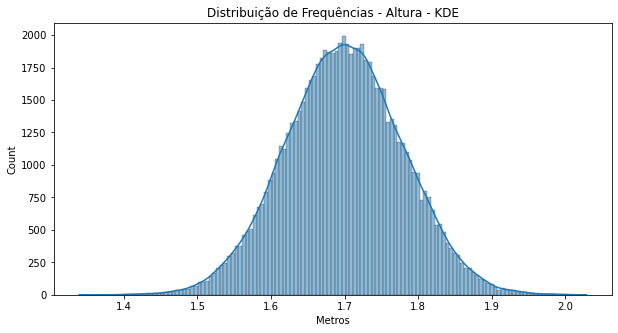

In [162]:
ax = sns.histplot(dados.Altura, kde=True)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=12)
ax.set_xlabel('Metros', fontsize=10);

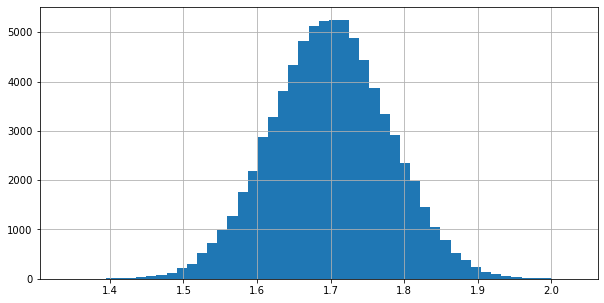

In [163]:
dados.Altura.hist(bins=50, figsize=(10, 5));

In [164]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


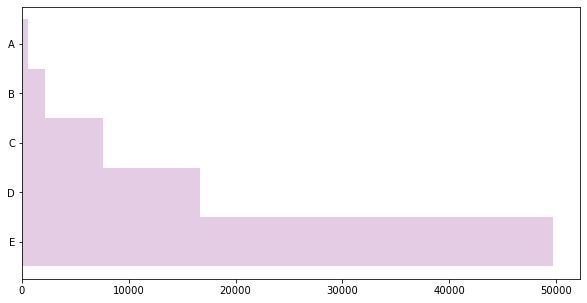

In [165]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.barh(width= 1, color='purple', alpha=0.2, figsize=(10, 5));

## 3- Medidas de Tendência Central

### Dataframe de exemplo

In [166]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis='columns', inplace=True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [167]:
df['Fulano'].mean()

7.714285714285714

### Média aritmética

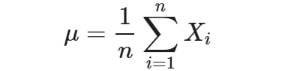

onde

n= número de observações (registros)

Xi = valor da i-ésima observação (registro)

In [168]:
dados.Renda.mean()

2000.3831988547631

In [169]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [170]:
dados.groupby(['Sexo']).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [171]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Mediana

Quando "n" for ímpar, a posição do elemento mediano será obtido com:

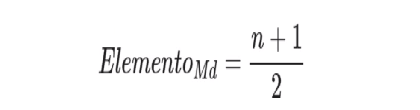
Quando "n" for par, será com:

Quando "n" for par, será com:
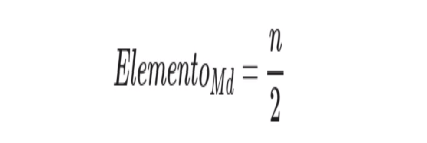

Quando n for ímpar, a posição do elemento mediano será obtida da seguinte forma:
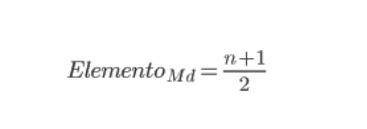

Quando n for par, a posição do elemento mediano será obtida da seguinte forma:
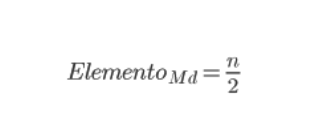





### Exemplo 1 - n ímpar

In [172]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [173]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [174]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [175]:
n = notas_fulano.shape[0]
n

7

In [176]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [177]:
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [178]:
notas_fulano.Fulano.median()

8.0

### Exemplo 2 - n par

In [179]:
notas_beltrano = df.Beltrano.sample(6, random_state=101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [180]:
notas_beltrano.median()

6.25

### Obtendo a mediana em nosso dataset

In [181]:
dados.Renda.median()

1200.0

In [182]:
dados.Renda.quantile()

1200.0

### Moda

In [183]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [184]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [185]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])

In [186]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

### Obtendo a moda em nosso dataset

In [187]:
dados.Renda.mode()

0    788
dtype: int64

In [188]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

### Relação entre média, mediana e moda

#### Avaliando a variável Renda

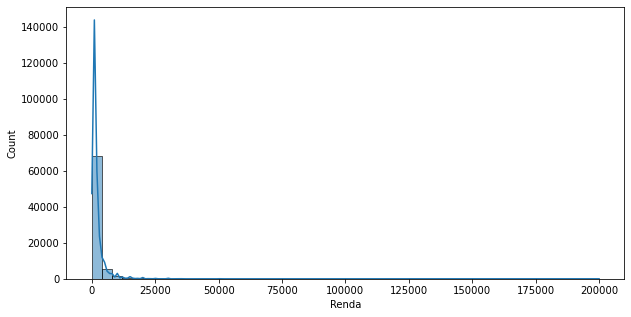

In [189]:
ax = sns.histplot(dados.Renda, bins=50, kde=True)
ax.figure.set_size_inches(10, 5);

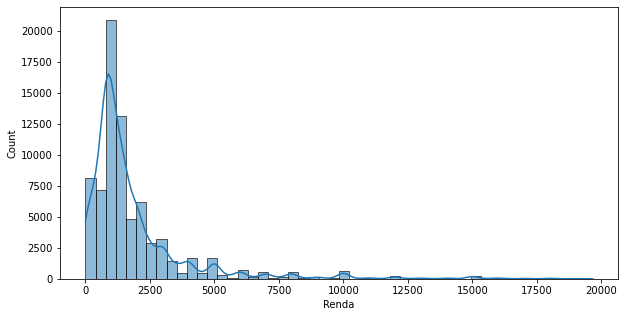

In [190]:
ax = sns.histplot(dados.query('Renda < 20000').Renda, bins=50, kde=True)
ax.figure.set_size_inches(10, 5);

In [191]:
Moda = dados.Renda.mode()[0]
Moda

788

In [192]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [193]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [194]:
# Assimetria à direita
Moda < Mediana < Media

True

#### Avaliando a variável Altura

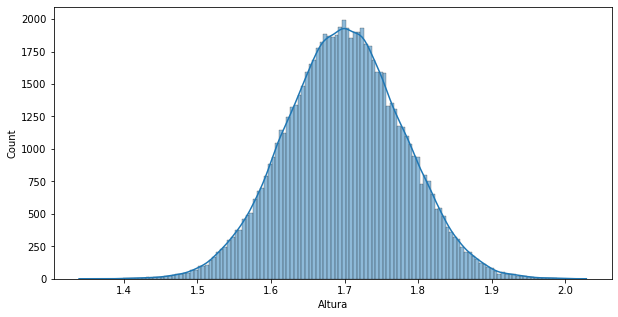

In [195]:
ax = sns.histplot(dados.Altura, kde=True)
ax.figure.set_size_inches(10, 5);

In [196]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [197]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [198]:
Media = dados.Altura.mean()
Media

1.6995124540575812

In [199]:
# Possivelmente simétrica

#### Avaliando a variável Anos de Estudo

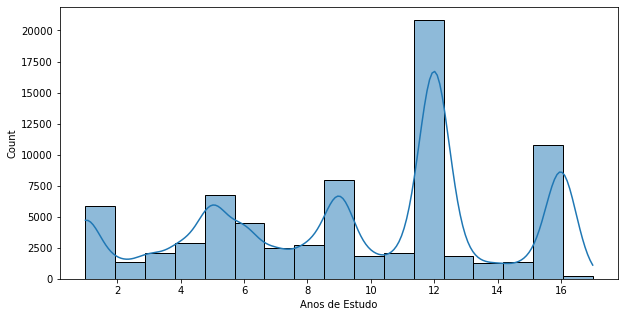

In [200]:
ax = sns.histplot(dados['Anos de Estudo'], bins=17, kde=True)
ax.figure.set_size_inches(10, 5);

In [201]:
Moda = dados['Anos de Estudo'].mode()[0]
Moda

12

In [202]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [203]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [204]:
# Assimetria à esquerda
Moda > Mediana > Media

True

## 4- Medidas Separatrizes

### Quartis, decis e percentis

Quartis: divide a variável em quatro partes iguais quanto ao número de elementos de cada uma;

Decis: divide em dez partes iguais;

Percentis: divide em cem partes iguais.



In [205]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [206]:
dados.Renda.quantile([i /10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [207]:
dados.Renda.quantile([i /100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

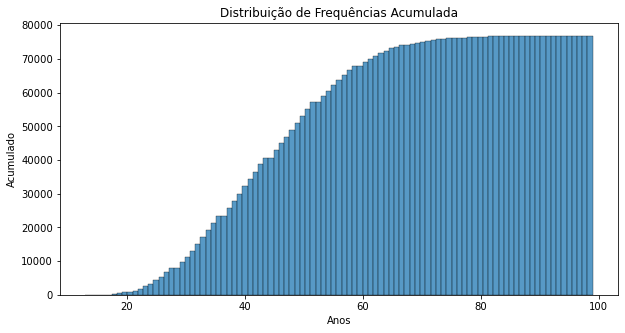

In [208]:
ax = sns.histplot(dados.Idade,
                  cumulative=True,
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=12)
ax.set_ylabel('Acumulado', fontsize=10)
ax.set_xlabel('Anos', fontsize=10);

In [209]:
dados.Idade.quantile([i / 10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

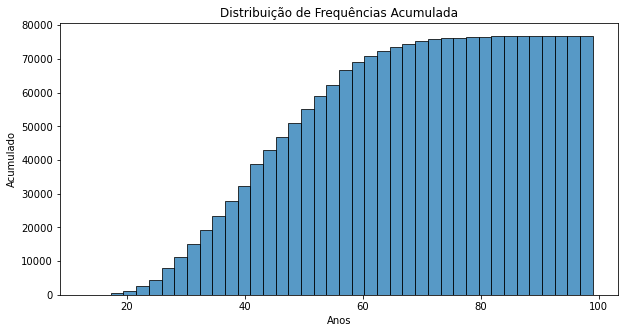

In [210]:
ax = sns.histplot(dados.Idade,
                  cumulative=True,
                  kde_kws = {'cumulative': True},
                  bins = 40)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=12)
ax.set_ylabel('Acumulado', fontsize=10)
ax.set_xlabel('Anos', fontsize=10);

### Box-plot

No Box-plot, encontraremos a representação gráfica que fornece muitas informações sobre nossos dados, como posição, dispersão, assimetria, discrepâncias(outliers).
O "Q1" representa o primeiro quartil de 25%, teremos a mediana ao meio e o terceiro quartil representado por "Q3". A diferença entre os dois é o índice interquartil "IIQ".


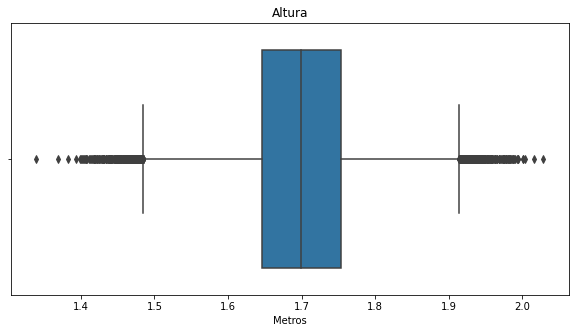

In [211]:
ax = sns.boxplot(x='Altura', data=dados, orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Altura', fontsize=12)
ax.set_xlabel('Metros', fontsize=10);

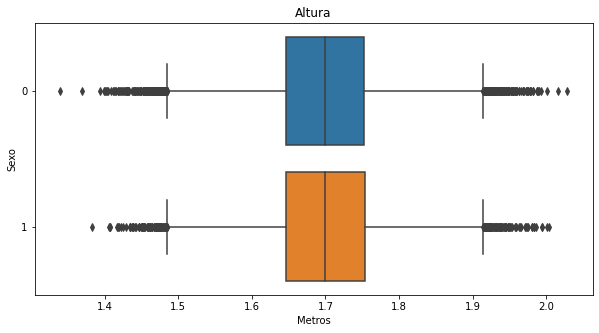

In [212]:
ax = sns.boxplot(x='Altura', y='Sexo', data=dados, orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Altura', fontsize=12)
ax.set_xlabel('Metros', fontsize=10);

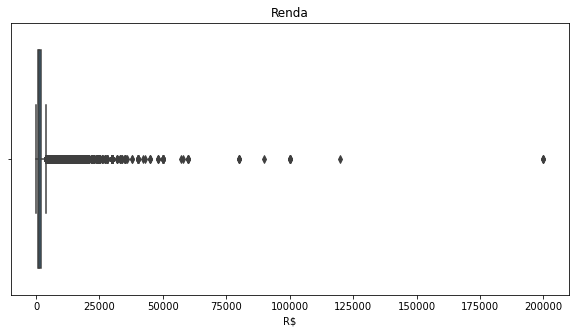

In [213]:
ax = sns.boxplot(x='Renda', data=dados, orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Renda', fontsize=12)
ax.set_xlabel('R$', fontsize=10);

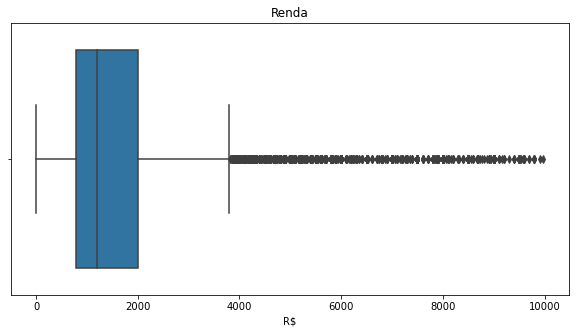

In [214]:
ax = sns.boxplot(x='Renda', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Renda', fontsize=12)
ax.set_xlabel('R$', fontsize=10);

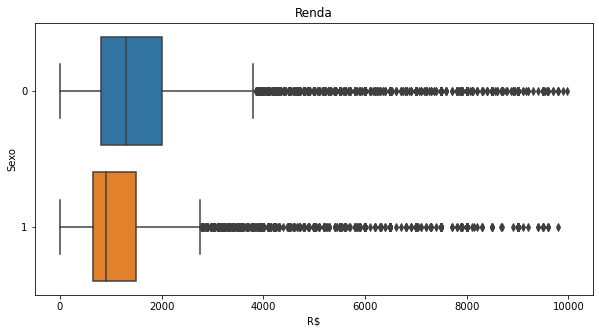

In [215]:
ax = sns.boxplot(x='Renda', y='Sexo', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Renda', fontsize=12)
ax.set_xlabel('R$', fontsize=10);

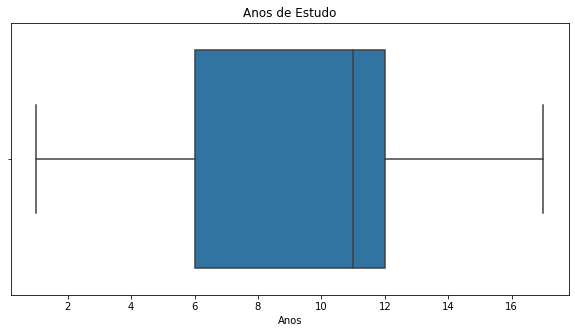

In [216]:
ax = sns.boxplot(x='Anos de Estudo', data=dados, orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Anos de Estudo', fontsize=12)
ax.set_xlabel('Anos', fontsize=10);

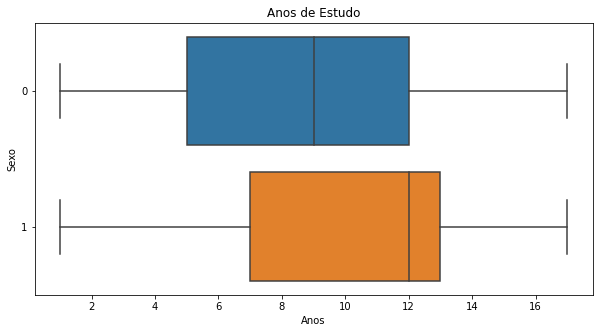

In [217]:
ax = sns.boxplot(x='Anos de Estudo', y='Sexo', data=dados, orient='h')
ax.figure.set_size_inches(10, 5)
ax.set_title('Anos de Estudo', fontsize=12)
ax.set_xlabel('Anos', fontsize=10);

## 5- Medidas de Dispersão

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

### Desvio médio absoluto

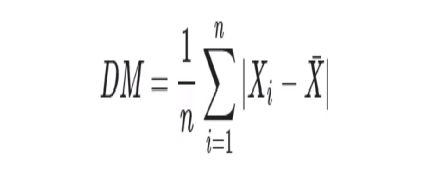

In [218]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [219]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [220]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [221]:
notas_fulano = pd.DataFrame(df.loc[:,'Fulano'])
notas_fulano

,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [222]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [223]:
notas_fulano['Desvio'] = notas_fulano.Fulano - nota_media_fulano
notas_fulano

,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [224]:
notas_fulano.Fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [225]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [226]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


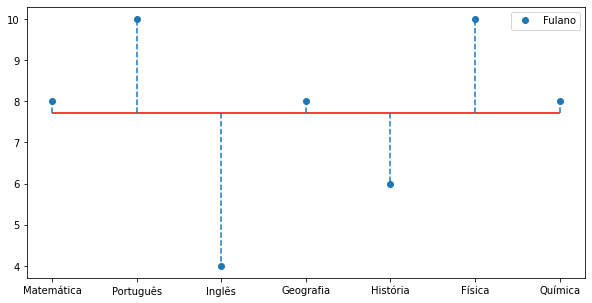

In [227]:
ax = notas_fulano[['Fulano']].plot(style = 'o')
ax.figure.set_size_inches(10, 5)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed');

In [228]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [229]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

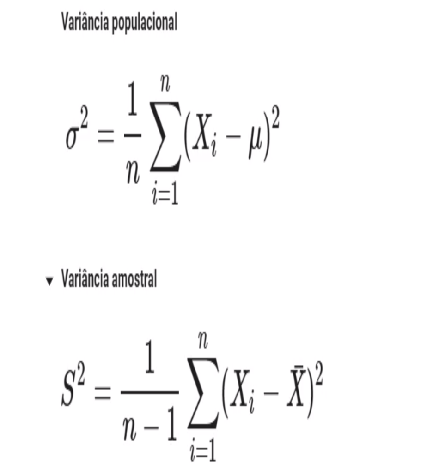

In [230]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [231]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [232]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

### Desvio Padrão

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

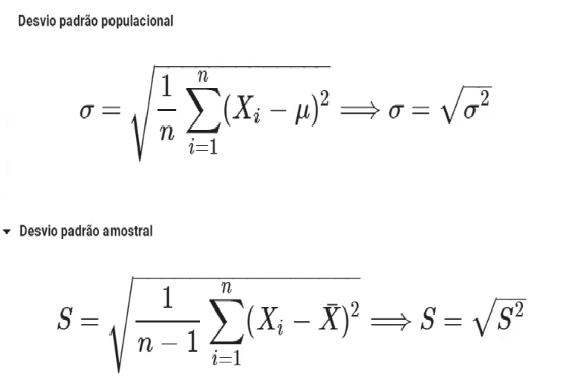